### Importing Pandas for data reading and data manipulation

import pandas as pd

### Reading data

In [2]:
data = pd.read_csv("C:\\Users\\ambar\\Downloads\\3. Police Data.csv")

### Reading first few rows and columns

In [3]:
data.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### Total no of rows and features

In [4]:
data.shape

(65535, 15)

### Data type of each variable

In [5]:
data.dtypes

stop_date              object
stop_time              object
country_name          float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

### Some basic information of data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

### Q. Is there any null values present or not ?

In [7]:
data.isnull().any()

stop_date             False
stop_time             False
country_name           True
driver_gender          True
driver_age_raw         True
driver_age             True
driver_race            True
violation_raw          True
violation              True
search_conducted      False
search_type            True
stop_outcome           True
is_arrested            True
stop_duration          True
drugs_related_stop    False
dtype: bool

### Total count of null values of each features

In [8]:
data.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

### Columns names

In [9]:
data.columns

Index(['stop_date', 'stop_time', 'country_name', 'driver_gender',
       'driver_age_raw', 'driver_age', 'driver_race', 'violation_raw',
       'violation', 'search_conducted', 'search_type', 'stop_outcome',
       'is_arrested', 'stop_duration', 'drugs_related_stop'],
      dtype='object')

### Dropping the column country_name as all values are null
### Use of inplace to make sure it is permanently dropped

In [12]:
data.drop(columns = 'country_name' , inplace = True)

### Checking if that column is dropped or not ?

In [13]:
data.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


### Checking Gender wise Speeding Violation

In [20]:
data[data.violation == 'Speeding'].driver_gender.value_counts()

M    25517
F    11686
Name: driver_gender, dtype: int64

import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Gender wise Traffic Rules violation'}, xlabel='Gender', ylabel='Count'>

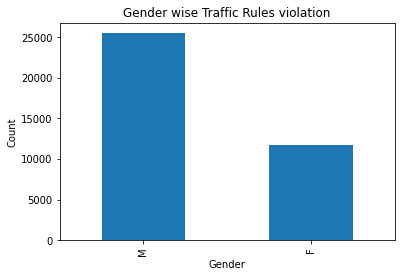

In [35]:
data[data.violation == 'Speeding'].driver_gender.value_counts().\
plot(kind = 'bar' , xlabel = 'Gender' , ylabel = 'Count' , title = 'Gender wise Traffic Rules violation'  )

### Gender wise Search Conducted by Police

<AxesSubplot:title={'center':'Gender wise search conducted by police'}, xlabel='Gender', ylabel='Count'>

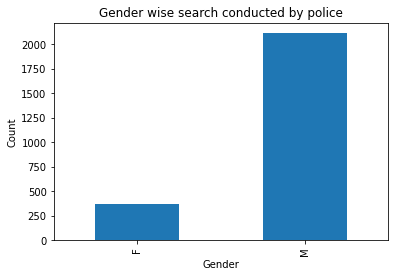

In [33]:
data.groupby('driver_gender').search_conducted.sum()\
.plot(title = 'Gender wise search conducted by police', kind = 'bar' , xlabel = 'Gender' , ylabel = 'Count')